# Header:
I would like to implement a simple convolution neural network architecture, that consist of only convolution and transition blocks (CT) with default batch size, epoch and optimizer. <br>
<b>First convolution Block:</b> Consist of 3 convolution layers of channel size 8, 16 & 22<br>
<b>First Transition Block:</b> Consist of Max Pooling layer of 2x2 followed by 1x1 convolution of 8 channels. <br>
<b>Second Convolution Block:</b> Consist of 2 convolution layers of channel size 16 & 22 <br>
<b> Second Transition Block:  Consist of convolution layer of 10 channels with 1x1 and followed by convolution of 7x7 kernel with input to make final prediction as 10 digits. <br>

###  Change Made: 
  1.	Dynamic learning rate that gets calculated on every epoch with initial value as 0.003
  2.  Run more epochs 25.
  


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


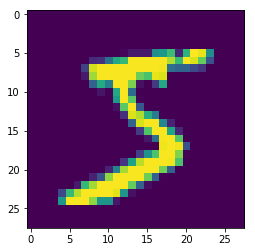

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

# input: 28 output: 26 | RF: 3
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1), name="conv2d_1") ) 
model.add(BatchNormalization())
model.add(Dropout(0.1))
# input: 26 output: 24 | RF: 5
model.add(Convolution2D(16, 3, 3, activation='relu', name="conv2d_2")) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))
# input: 24 output: 22 | RF: 7
model.add(Convolution2D(22, 3, 3, activation='relu', name="conv2d_3")) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 22 output: 11 | RF: 14
model.add(MaxPooling2D(pool_size=(2, 2), name = "max_pooling2d_1")) # 11
# input: 11 output: 11 | RF: 14
model.add(Convolution2D(8, 1, 1, activation='relu', name="conv2d_4" ))# 11
model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 11 output: 9 | RF: 16
model.add(Convolution2D(16, 3, 3, activation='relu', name="conv2d_5")) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))
# input: 9 output: 7 | RF: 18
model.add(Convolution2D(22, 3, 3, activation='relu', name="conv2d_6")) # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 7 output: 7 | RF: 18
model.add(Convolution2D(10, 1, activation='relu', name="conv2d_7")) #7
model.add(BatchNormalization())
model.add(Dropout(0.1))
# input: 7 output: 1 | RF: 25
model.add(Convolution2D(10, 7, name="conv2d_8"))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv2d_1")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv2d_2")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu", name="conv2d_3")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", name="conv2d_4")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv2d_5")`
/usr/local/lib/pyth

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 22)        3190      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#from keras.optimizers import Adam
#from keras.callbacks import LearningRateScheduler
#def scheduler(epoch, lr):
#  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train,  validation_data=(X_test,Y_test), batch_size=64, nb_epoch=30, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
  832/60000 [..............................] - ETA: 14s - loss: 0.0143 - acc: 0.9952

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 13s 216us/step - loss: 0.0280 - acc: 0.9909 - val_loss: 0.0326 - val_acc: 0.9902
Epoch 2/30
60000/60000 [==============================] - 14s 229us/step - loss: 0.0248 - acc: 0.9915 - val_loss: 0.0248 - val_acc: 0.9922
Epoch 3/30
60000/60000 [==============================] - 15s 246us/step - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0224 - val_acc: 0.9933
Epoch 4/30
60000/60000 [==============================] - 13s 217us/step - loss: 0.0237 - acc: 0.9920 - val_loss: 0.0286 - val_acc: 0.9917
Epoch 5/30
60000/60000 [==============================] - 13s 216us/step - loss: 0.0220 - acc: 0.9925 - val_loss: 0.0256 - val_acc: 0.9919
Epoch 6/30
60000/60000 [==============================] - 13s 217us/step - loss: 0.0238 - acc: 0.9922 - val_loss: 0.0252 - val_acc: 0.9931
Epoch 7/30
60000/60000 [==============================] - 13s 217us/step - loss: 0.0223 - acc: 0.9926 - val_loss: 0.0234 - val_acc: 0.9917
Epoch 8/30
60000/60000 [==============

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.022434139274434165, 0.9926]


## Conclusion:
Total params: 14,528 <br>
Training Accuracy: 99.40<br>
Validation Accuracy: 99.44<br>
Batch Size:64<br>
Epoch: 30<br>

This architecture reached highest training accuracy 99.44% at 21st epoch and validation accuracy as 99.44%

Changed Learning rate as dynamic learning rate that did reduce validation accuracy to 99.26%. So, I dropped that option.

Have used same network as in Third_DNN and increased number of epoch as 20 to 30. Highed valudation accuracy recorded on 21st epoch of 99.4% and training accuracy for the same is 99.4%. Looks this model generalize well and does not overfit. So, I conlude this is best model.



In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.05788711e-10 1.12385917e-11 1.07366964e-06 2.02319666e-06
  5.10818720e-15 1.32397848e-09 7.98820041e-22 9.99996662e-01
  5.86225513e-11 2.45080003e-07]
 [2.86442381e-09 1.57200319e-07 9.99999881e-01 5.84816029e-10
  9.82326720e-11 1.36023855e-13 1.29281219e-09 9.32607924e-15
  1.07511884e-08 2.58631701e-12]
 [8.80493900e-09 9.99955773e-01 4.72631928e-06 1.11963921e-07
  1.54639999e-08 3.20208784e-07 7.54117124e-08 3.11733711e-05
  7.35882668e-06 3.67327772e-07]
 [9.99995351e-01 1.17524913e-13 3.30965833e-08 1.73780521e-11
  2.44599949e-08 4.61950443e-12 1.81780169e-09 2.09264300e-10
  3.91875282e-11 4.66360189e-06]
 [1.16181153e-11 2.71727196e-10 1.27635073e-11 1.36556419e-10
  9.99992132e-01 5.19595976e-13 8.27035596e-09 2.59468695e-08
  9.11151915e-07 6.99235261e-06]
 [7.65246710e-09 9.99897361e-01 2.72809539e-05 2.99470493e-08
  2.36652397e-07 7.56488472e-09 1.76542247e-08 6.94679766e-05
  5.16420141e-06 4.45862014e-07]
 [8.77321910e-20 5.71830604e-11 6.57487248e-13 1.07786408e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_8'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()